In [13]:
# créer une liste de 1 à 10 de 1 en 1 puis de 5 en 5 jusqu'à 40 puis de 20 en 20 jusqu'à 80
espace_mm = list(range(1,11,1)) + list(range(15,41,5)) + list(range(60,81,20))
print(espace_mm)

# diviser par 1000 pour obtenir des mètres
espace_m = [x/1000 for x in espace_mm]
print(espace_m)

# calculer l'inverse de l'espace
espace_inv = [1/x for x in espace_m]
print(espace_inv)

# creer une variable e0 pour la constante de perméabilité du vide
e0 = 8.854187817e-12

# importer de 'tp-condensateur.xlsx' les donnees de la 2e colonne
import pandas as pd
df = pd.read_excel('tp-condensateur.xlsx', usecols='B')

# creer une liste des 18 premieres valeurs de la 2e colonne
valeurs = df.values.tolist()
valeurs = valeurs[:18]

# multiplier par 10^9 pour obtenir des valeurs en Farads
capcite_mes = [(x[0] / (10**9)) for x in valeurs]
print(capcite_mes)

# creer un varible surface de 0.099 metre de rayon
import numpy as np
surface = np.pi*np.power(0.099,2)
print(surface)

# creer une variable courant_parasite de 0.041 nanoFarad et la convertir en Farad
courant_parasite = 0.041 / (10**9)
print(courant_parasite)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 35, 40, 60, 80]
[0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.015, 0.02, 0.025, 0.03, 0.035, 0.04, 0.06, 0.08]
[1000.0, 500.0, 333.3333333333333, 250.0, 200.0, 166.66666666666666, 142.85714285714286, 125.0, 111.11111111111111, 100.0, 66.66666666666667, 50.0, 40.0, 33.333333333333336, 28.57142857142857, 25.0, 16.666666666666668, 12.5]
[3.4e-10, 1.87e-10, 1.5e-10, 1.05e-10, 9.199999999999999e-11, 8.300000000000001e-11, 7.399999999999999e-11, 7.399999999999999e-11, 8.5e-11, 6.900000000000001e-11, 7e-11, 5.1999999999999995e-11, 6.4e-11, 5.5e-11, 4.8e-11, 4.5e-11, 4.8e-11, 4.9e-11]
0.030790749597833563
4.1e-11


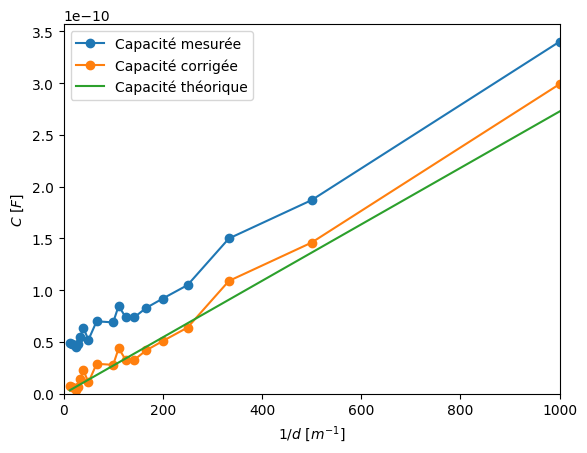

[9.673624512248749, 7.106014573834907, 19.944064265904156, 6.098836538007763, 6.4656379577811816, 7.5660422171013595, 15.268872032342957, 3.164425179820535, 45.253362230269246, 2.7043975365540383, 59.558617601432154, 19.30368764985046, 110.91081636970914, 54.05659630483098, 10.133652155515206, 41.31177283625486, 54.05659630483106, 134.75290865498053]  en %
33.74055138451496  %


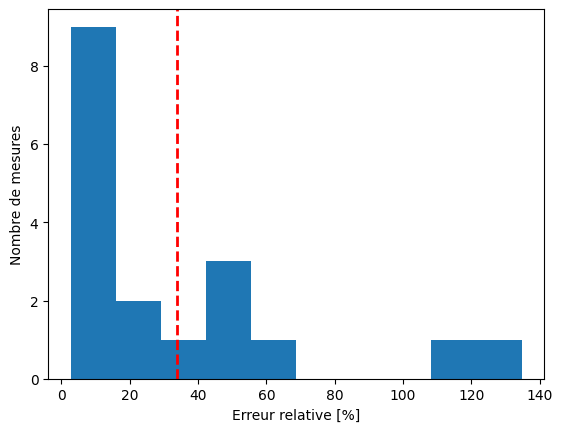

[0.299, 0.146, 0.109, 0.064, 0.051, 0.042, 0.033, 0.033, 0.044, 0.028, 0.029, 0.011, 0.023, 0.014, 0.007, 0.004, 0.007, 0.008]
[0.273, 0.136, 0.091, 0.068, 0.055, 0.045, 0.039, 0.034, 0.03, 0.027, 0.018, 0.014, 0.011, 0.009, 0.008, 0.007, 0.005, 0.003]


In [14]:
# grapher la capacité mesurée en fonction de l'inverse de l'espace
# grapher la capacité mesuree - le courant parasite en fonction de l'inverse de l'espace
# grapher la capacité théorique en fonction de l'inverse de l'espace

import matplotlib.pyplot as plt

plt.plot(espace_inv, capcite_mes, 'o-', label='Capacité mesurée')
plt.plot(espace_inv, [x - courant_parasite for x in capcite_mes], 'o-', label='Capacité corrigée')
plt.plot(espace_inv, [e0*surface/x for x in espace_m], label='Capacité théorique')

plt.xlabel(r'$1/d \ [m^{-1}]$')
plt.ylabel(r'$C \ [F]$')
plt.legend()

plt.xlim(0, 1000)
plt.ylim(0)

plt.show()

# calculer l'erreur relative entre la capacité corrigée et la capacité théorique
erreur_relative = [abs((x - y) / y) * 100 for x, y in zip([x - courant_parasite for x in capcite_mes], [e0*surface/x for x in espace_m])]
print(erreur_relative, ' en %')

# calculer l'erreur relative moyenne
erreur_relative_moyenne = sum(erreur_relative) / len(erreur_relative)
print(erreur_relative_moyenne, ' %')

# mettre ces valeurs dans un histogramme
plt.hist(erreur_relative, bins=10)

# ajouter une ligne verticale pour la valeur moyenne
plt.axvline(erreur_relative_moyenne, color='r', linestyle='dashed', linewidth=2)

plt.xlabel('Erreur relative [%]')
plt.ylabel('Nombre de mesures')
plt.show()

# imprimer les capacités corrigees
print([np.round((x - courant_parasite)*10**9, 3) for x in capcite_mes])
# imprimer les capacites theoriques
print([np.round(e0*surface/x*10**9, 3) for x in espace_m])

[0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 250, 300, 400, 500, 600]
[0.0, 2e-05, 4e-05, 6e-05, 8e-05, 0.0001, 0.00012, 0.00014, 0.00016, 0.00018, 0.0002, 0.00025, 0.0003, 0.0004, 0.0005, 0.0006]
[8.4, 7.52, 6.8, 6.08, 5.52, 4.96, 4.48, 4, 3.6, 3.28, 2.96, 2.24, 1.76, 1.04, 0.48, 0.4]
[    8.38106229 -5253.70523787]


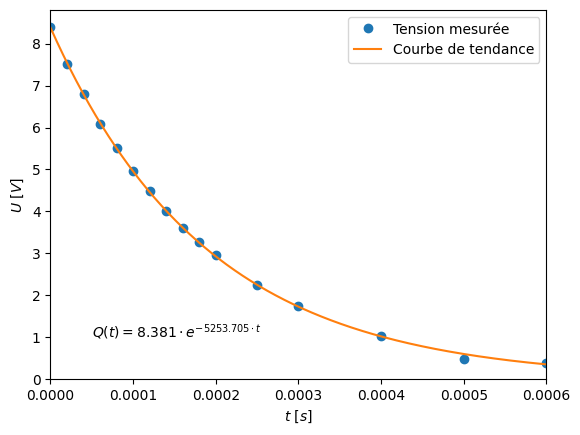

La capacité est de  9.517092744300949e-11  Farad
La difference de capacité est de  35.95846777572784  %
La difference de Q0 est de  -0.22544891129601333  %


In [4]:
# creer une liste de 0 a 600, de 20 en 20 jusqua 200, puis de 50 en 50 jusqua 300, puis de 100 en 100 jusqua 600
t_15_ms = list(range(0,201,20)) + list(range(250,301,50)) + list(range(400,601,100))
print(t_15_ms)

# diviser par 1_000_000 pour obtenir des secondes
t_15_s = [x/1_000_000 for x in t_15_ms]
print(t_15_s)

# importer les valeurs de la deuxieme colonne de 21 a 37
df = pd.read_excel('tp-condensateur.xlsx', usecols='B')
valeurs = df.values.tolist()
valeurs = valeurs[21:37]

# rendre lisible
capcite_15_mes = [(x[0]) for x in valeurs]
print(capcite_15_mes)

# calculer la courbe de tendance exponentielle de la capacité mesurée en fonction du temps

from scipy.optimize import curve_fit

def func(x, a, b):
    return a * np.exp(b * x)

popt, pcov = curve_fit(func, t_15_s, capcite_15_mes)

print(popt)

# grapher la capacité mesurée en fonction du temps
# grapher la courbe de tendance exponentielle de la capacité mesurée en fonction du temps de 0 a 0.6 secondes

plt.plot(t_15_s, capcite_15_mes, 'o', label='Tension mesurée')
plt.plot(np.linspace(0, 0.0006, 1000), func(np.linspace(0, 0.0006, 1000), *popt), label='Courbe de tendance')

plt.text(0.00005, 1, r'$Q(t) = {} \cdot e^{{ {} \cdot t}}$'.format(round(popt[0], 3), round(popt[1], 3)))

plt.xlabel(r'$t \ [s]$')
plt.ylabel(r'$U \ [V]$')
plt.legend()

plt.xlim(0, 0.0006)
plt.ylim(0)

plt.show()

capacite_15 = -1/popt[1] / 2e6
print('La capacité est de ', capacite_15, ' Farad')
print('La difference de capacité est de ', (capacite_15 - capcite_mes[10])/capcite_mes[10] * 100, ' %')
print('La difference de Q0 est de ', (popt[0] - capcite_15_mes[0])/capcite_15_mes[0] * 100, ' %')

[0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600]
[0.0, 5e-05, 0.0001, 0.00015, 0.0002, 0.00025, 0.0003, 0.00035, 0.0004, 0.00045, 0.0005, 0.00055, 0.0006]
[8.56, 6.96, 6.08, 5.04, 4.32, 3.5, 3.04, 2.5, 2.08, 1.7, 1.52, 1.2, 1.12]
[    8.49275988 -3482.05888865]


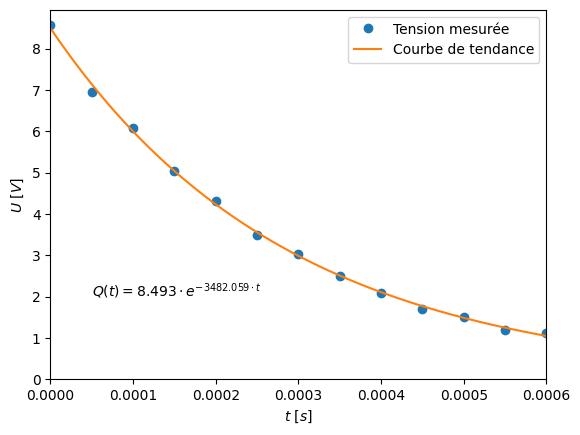

La capacité est de  1.435932062003884e-10  Farad
La difference de capacité est de  -23.21218919765326  %
La difference de Q0 est de  -0.7855154773809778  %


In [5]:
# creer une liste de 0 a 600, de 50 en 50
t_2_ms = list(range(0,601,50))
print(t_2_ms)

# diviser par 1_000_000 pour obtenir des secondes
t_2_s = [x/1_000_000 for x in t_2_ms]
print(t_2_s)

# importer les valeurs de la deuxieme colonne de 38 a 51
df = pd.read_excel('tp-condensateur.xlsx', usecols='B')
valeurs = df.values.tolist()
valeurs = valeurs[38:51]

# rendre lisible
capcite_2_mes = [(x[0]) for x in valeurs]
print(capcite_2_mes)

# calculer la courbe de tendance exponentielle de la capacité mesurée en fonction du temps

popt, pcov = curve_fit(func, t_2_s, capcite_2_mes)

print(popt)

# grapher la capacité mesurée en fonction du temps
# grapher la courbe de tendance exponentielle de la capacité mesurée en fonction du temps de 0 a 0.6 secondes

plt.plot(t_2_s, capcite_2_mes, 'o', label='Tension mesurée')
plt.plot(np.linspace(0, 0.0006, 1000), func(np.linspace(0, 0.0006, 1000), *popt), label='Courbe de tendance')

plt.text(0.00005, 2, r'$Q(t) = {} \cdot e^{{ {} \cdot t}}$'.format(round(popt[0], 3), round(popt[1], 3)))

plt.xlabel(r'$t \ [s]$')
plt.ylabel(r'$U \ [V]$')
plt.legend()

plt.xlim(0, 0.0006)
plt.ylim(0)

plt.show()

capacite_2 = -1/popt[1] / 2e6
print('La capacité est de ', capacite_2, ' Farad')
print('La difference de capacité est de ', (capacite_2 - capcite_mes[1])/capcite_mes[1] * 100, ' %')
print('La difference de Q0 est de ', (popt[0] - capcite_2_mes[0])/capcite_2_mes[0] * 100, ' %')

[0.0, 2.5, 5.0, 7.5, 10.0, 12.5, 15.0, 17.5, 20.0, 22.5, 25.0]
[8.32, 6.08, 4.64, 3.5, 2.72, 2.1, 1.6, 1.2, 1.04, 0.75, 0.56]
[   8.18205375 -110.20304485]


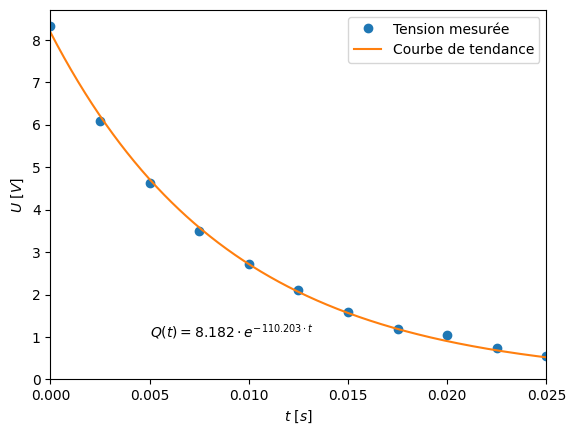

La capacité est de  9.074159442285785e-05  Farad


In [6]:
# creer une liste de 0 a 25, de 2.5 en 2.5
t_cond1_ms = [x/2 for x in range(0,26*2,5)]
print(t_cond1_ms)

# diviser par 1_000 pour obtenir des secondes
t_cond1_s = [x/1_000 for x in t_cond1_ms]

# importer les valeurs de la deuxieme colonne de 'cond2.xlsx'
df = pd.read_excel('cond2.xlsx', usecols='B')
valeurs = df.values.tolist()
valeurs = valeurs[1:12]

# rendre lisible
capcite_cond1_mes = [(x[0]) for x in valeurs]
print(capcite_cond1_mes)

# calculer la courbe de tendance exponentielle de la capacité mesurée en fonction du temps

popt, pcov = curve_fit(func, t_cond1_s, capcite_cond1_mes)

print(popt)

# grapher la capacité mesurée en fonction du temps
# grapher la courbe de tendance exponentielle de la capacité mesurée en fonction du temps de 0 a 0.6 secondes

plt.plot(t_cond1_s, capcite_cond1_mes, 'o', label='Tension mesurée')
plt.plot(np.linspace(0, 0.025, 1000), func(np.linspace(0, 0.025, 1000), *popt), label='Courbe de tendance')

plt.text(0.005, 1, r'$Q(t) = {} \cdot e^{{ {} \cdot t}}$'.format(round(popt[0], 3), round(popt[1], 3)))

plt.xlabel(r'$t \ [s]$')
plt.ylabel(r'$U \ [V]$')
plt.legend()

plt.xlim(0, 0.025)
plt.ylim(0)

plt.show()

capacite_cond1 = -1/popt[1] / 100
print('La capacité est de ', capacite_cond1, ' Farad')

[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2]
[9.12, 7.68, 6.4, 5.36, 4.56, 3.84, 3.28, 2.8, 2.32, 2, 1.76, 1.44]
[   10.73583743 -1696.2112914 ]


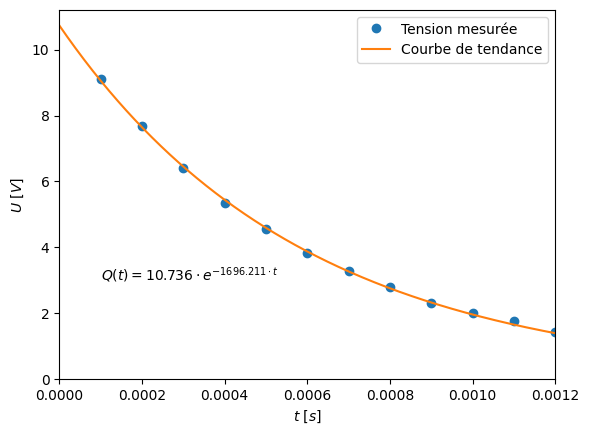

La capacité est de  5.8954919417907646e-06  Farad


In [7]:
# creer une liste de 0.1 a 1.2, de 0.1 en 0.1
t_cond2_ms = [x/10 for x in range(1,13,1)]
print(t_cond2_ms)

# diviser par 1_000 pour obtenir des secondes
t_cond2_s = [x/1_000 for x in t_cond2_ms]

# importer les valeurs de la deuxieme colonne de 'cond2.xlsx'
df = pd.read_excel('cond2.xlsx', usecols='B')
valeurs = df.values.tolist()
valeurs = valeurs[15:27]

# rendre lisible
capcite_cond2_mes = [(x[0]) for x in valeurs]
print(capcite_cond2_mes)

# calculer la courbe de tendance exponentielle de la capacité mesurée en fonction du temps

popt, pcov = curve_fit(func, t_cond2_s, capcite_cond2_mes)

print(popt)

# grapher la capacité mesurée en fonction du temps
# grapher la courbe de tendance exponentielle de la capacité mesurée en fonction du temps de 0 a 0.6 secondes

plt.plot(t_cond2_s, capcite_cond2_mes, 'o', label='Tension mesurée')
plt.plot(np.linspace(0, 0.0012, 1000), func(np.linspace(0, 0.0012, 1000), *popt), label='Courbe de tendance')

plt.text(0.0001, 3, r'$Q(t) = {} \cdot e^{{ {} \cdot t}}$'.format(round(popt[0], 3), round(popt[1], 3)))

plt.xlabel(r'$t \ [s]$')
plt.ylabel(r'$U \ [V]$')
plt.legend()

plt.xlim(0, 0.0012)
plt.ylim(0)

plt.show()

capacite_cond2 = -1/popt[1] / 100
print('La capacité est de ', capacite_cond2, ' Farad')

In [8]:
# imprimer toute les variables, arrondi a 3 chiffres apres la virgule
print("espace_mm = ", [np.round(x, 3) for x in espace_mm])
print("capcite_mes = ", [np.round(x * (10**9), 3) for x in capcite_mes])
print("#############################################")
print("capcite_15_mes = ", [np.round(x, 3) for x in capcite_15_mes])
print("t_15_ms = ", [np.round(x, 3) for x in t_15_ms])
print("\n")
print("capcite_2_mes = ", [np.round(x, 3) for x in capcite_2_mes])
print("t_2_ms = ", [np.round(x, 3) for x in t_2_ms])
print("#############################################")
print("capcite_cond1_mes = ", [np.round(x, 3) for x in capcite_cond1_mes])
print("t_cond1_ms = ", [np.round(x, 3) for x in t_cond1_ms])
print("\n")
print("capcite_cond2_mes = ", [np.round(x, 3) for x in capcite_cond2_mes])
print("t_cond2_ms = ", [np.round(x, 3) for x in t_cond2_ms])


espace_mm =  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 35, 40, 60, 80]
capcite_mes =  [0.34, 0.187, 0.15, 0.105, 0.092, 0.083, 0.074, 0.074, 0.085, 0.069, 0.07, 0.052, 0.064, 0.055, 0.048, 0.045, 0.048, 0.049]
#############################################
capcite_15_mes =  [8.4, 7.52, 6.8, 6.08, 5.52, 4.96, 4.48, 4, 3.6, 3.28, 2.96, 2.24, 1.76, 1.04, 0.48, 0.4]
t_15_ms =  [0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 250, 300, 400, 500, 600]


capcite_2_mes =  [8.56, 6.96, 6.08, 5.04, 4.32, 3.5, 3.04, 2.5, 2.08, 1.7, 1.52, 1.2, 1.12]
t_2_ms =  [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600]
#############################################
capcite_cond1_mes =  [8.32, 6.08, 4.64, 3.5, 2.72, 2.1, 1.6, 1.2, 1.04, 0.75, 0.56]
t_cond1_ms =  [0.0, 2.5, 5.0, 7.5, 10.0, 12.5, 15.0, 17.5, 20.0, 22.5, 25.0]


capcite_cond2_mes =  [9.12, 7.68, 6.4, 5.36, 4.56, 3.84, 3.28, 2.8, 2.32, 2, 1.76, 1.44]
t_cond2_ms =  [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2]


In [9]:
cond10 = 9.31
cond22 = 23.98
cond47 = 55.7

cond_ser = 1/((1/cond10) + (1/cond22) + (1/cond47))
print("La condutivité en série est de ", cond_ser, " microF")
cond_ser1022 = 1/((1/cond10) + (1/cond22))
print("La condutivité en série 10 et 22 est de ", cond_ser1022, " microF")
cond_ser1047 = 1/((1/cond10) + (1/cond47))
print("La condutivité en série 10 et 47 est de ", cond_ser1047, " microF")
cond_ser2247 = 1/((1/cond22) + (1/cond47))
print("La condutivité en série 22 et 47 est de ", cond_ser2247, " microF")

print("\n")

cond_par = cond10 + cond22 + cond47
print("La condutivité en parallèle est de ", cond_par, " microF")
cond_par1022 = cond10 + cond22
print("La condutivité en parallèle 10 et 22 est de ", cond_par1022, " microF")
cond_par1047 = cond10 + cond47
print("La condutivité en parallèle 10 et 47 est de ", cond_par1047, " microF")
cond_par2247 = cond22 + cond47
print("La condutivité en parallèle 22 et 47 est de ", cond_par2247, " microF")

print("\n")

cond_mixte = 1/(1/cond47 + 1/cond22) + cond10
print("La condutivité mixte est de ", cond_mixte, " microF")

print("\n")

mes_ser = 5.91
mes_ser1022 = 6.67
mes_ser1047 = 7.92
mes_ser2247 = 16.61
mes_par = 90.2
mes_par1022 = 33.58
mes_par1047 = 65.4
mes_par2247 = 80.2
mes_mixte = 26.21

# calculer l'erreur relative
err_ser = (cond_ser - mes_ser) / mes_ser * 100
err_ser1022 = (cond_ser1022 - mes_ser1022) / mes_ser1022 * 100
err_ser1047 = (cond_ser1047 - mes_ser1047) / mes_ser1047 * 100
err_ser2247 = (cond_ser2247 - mes_ser2247) / mes_ser2247 * 100
err_par = (cond_par - mes_par) / mes_par * 100
err_par1022 = (cond_par1022 - mes_par1022) / mes_par1022 * 100
err_par1047 = (cond_par1047 - mes_par1047) / mes_par1047 * 100
err_par2247 = (cond_par2247 - mes_par2247) / mes_par2247 * 100
err_mixte = (cond_mixte - mes_mixte) / mes_mixte * 100

# calculer l'erreur relative entre mes_ser et capcite_cond2
err_cond1 = (mes_ser/1_000_000 - capacite_cond2) / capacite_cond2 * 100
err_cond2 = (mes_par/1_000_000 - capacite_cond1) / capacite_cond1 * 100
# calculer l'erreur relative entre cond_ser et capcite_cond2
err_cond1_2 = (cond_ser/1_000_000 - capacite_cond2) / capacite_cond2 * 100
err_cond2_2 = (cond_par/1_000_000 - capacite_cond1) / capacite_cond1 * 100

# imprimer toute les variables, arrondi a 3 chiffres apres la virgule
print("err_ser = ", np.round(err_ser, 3))
print("err_ser1022 = ", np.round(err_ser1022, 3))
print("err_ser1047 = ", np.round(err_ser1047, 3))
print("err_ser2247 = ", np.round(err_ser2247, 3))
print("\n")
print("err_par = ", np.round(err_par, 3))
print("err_par1022 = ", np.round(err_par1022, 3))
print("err_par1047 = ", np.round(err_par1047, 3))
print("err_par2247 = ", np.round(err_par2247, 3))
print("\n")
print("err_mixte = ", np.round(err_mixte, 3))
print("\n")
print("#############################################")
print("\n")
print("err_cond1 = ", np.round(err_cond1, 3))
print("err_cond2 = ", np.round(err_cond2, 3))
print("\n")
print("err_cond1_2 = ", np.round(err_cond1_2, 3))
print("err_cond2_2 = ", np.round(err_cond2_2, 3))

La condutivité en série est de  5.985653890519155  microF
La condutivité en série 10 et 22 est de  6.706332231901473  microF
La condutivité en série 10 et 47 est de  7.976726657437316  microF
La condutivité en série 22 et 47 est de  16.76312751004016  microF


La condutivité en parallèle est de  88.99000000000001  microF
La condutivité en parallèle 10 et 22 est de  33.29  microF
La condutivité en parallèle 10 et 47 est de  65.01  microF
La condutivité en parallèle 22 et 47 est de  79.68  microF


La condutivité mixte est de  26.07312751004016  microF


err_ser =  1.28
err_ser1022 =  0.545
err_ser1047 =  0.716
err_ser2247 =  0.922


err_par =  -1.341
err_par1022 =  -0.864
err_par1047 =  -0.596
err_par2247 =  -0.648


err_mixte =  -0.522


#############################################


err_cond1 =  0.246
err_cond2 =  -0.597


err_cond1_2 =  1.529
err_cond2_2 =  -1.93
